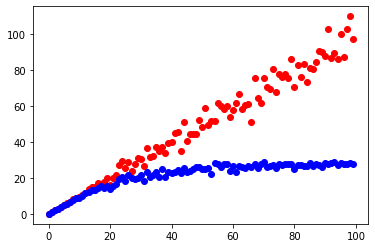

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import seaborn as sns


# This is a basic test of how the root mean squared errors
# might differ as y is regressed on x versus if x is regressed on y
# This basically explores how horizontal deviations in the OLS
# regression are different depending on the variables, even in the two variable case.
n = 100

y_residuals = np.zeros(n)
x_residuals = np.zeros(n)

seq = np.array([i for i in range(n)])
formula = "y ~ x"

for i in range(n):
    x = np.array([i for i in range(100)])
    y = x + np.random.normal(0, i, 100)
    
    x_with_intercept = sm.add_constant(x)
    results = sm.OLS(y, x_with_intercept).fit()
    rmse_residuals = np.sqrt(results.mse_resid)
    
    y_residuals[i] = rmse_residuals
    #y_residuals[i] = results.bse[1]
    
    y_with_intercept = sm.add_constant(y)
    results = sm.OLS(x, y_with_intercept).fit()
    rmse_residuals = np.sqrt(results.mse_resid)
    
    x_residuals[i] = rmse_residuals
    #x_residuals[i] = results.bse[1]

plt.scatter(seq, y_residuals, color='red')
plt.scatter(seq, x_residuals, color='blue')

(-10.0, 10.0)

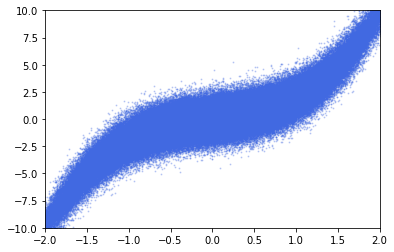

In [2]:
# This is a test of additive noise models
# The paper can be found: http://philsci-archive.pitt.edu/15984/1/Causal%20Inference%20from%20Noise.pdf
# Essentially, what they are doing is they are saying they can determine causality from two variables only
# Through looking at the noise and assuming that the noise is not symmetric
# That is to say, p(y|x) does not equal p(x|y), perhaps due to some non-linearities within
# the causal mechanism. Here, the more gaussian distributions mean that they are more likely to be
# the causal mechanism.

n = 250000
x = np.random.normal(0, 1, 250000)
y = x + x**3 + np.random.normal(0, 1, 250000)
plt.scatter(x, y, color='royalblue', alpha=0.25, s=1)
plt.xlim([-2, 2])
plt.ylim([-10, 10])

In [3]:
y_given_x = y[(x > 0.95) & (x < 1.05)]

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   2.,   2.,   3.,
          6.,   5.,   6.,   7.,  14.,   9.,  12.,  16.,  21.,  25.,  27.,
         23.,  44.,  51.,  54.,  62.,  62.,  96.,  62.,  75., 116., 115.,
        134., 139., 161., 163., 145., 162., 167., 211., 179., 190., 208.,
        203., 198., 178., 181., 202., 185., 160., 185., 150., 138., 135.,
        142., 111., 134., 102., 121.,  97.,  83.,  83.,  55.,  62.,  44.,
         37.,  34.,  30.,  27.,  20.,  19.,   8.,  14.,  12.,   5.,   8.,
          6.,   8.,   3.,   1.,   0.,   1.,   4.,   1.,   3.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-1.73380475e+00, -1.65140878e+00, -1.56901282e+00, -1.48661685e+00,
        -1.40422088e+00, -1.32182492e+00, -1.23942895e+00, -1.15703298e+00,
        -1.07463701e+00, -9.92241046e-01, -9.09845079e-01, -8.27449112e-01,
        -7.45053144e-01, -6.62657177e-01, -5.80261210e-01, -4.97865242e-01,
        -4.154

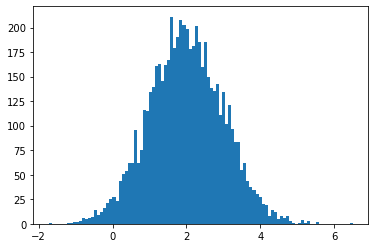

In [4]:
plt.hist(y_given_x, bins=100)

(array([ 1.,  0.,  1.,  0.,  1.,  1.,  0.,  3.,  1.,  3.,  7.,  4.,  8.,
         6., 11., 18., 12.,  9., 16., 17., 21., 17., 25., 22., 25., 30.,
        34., 35., 37., 47., 37., 39., 48., 55., 41., 38., 38., 57., 51.,
        52., 67., 64., 60., 75., 71., 62., 76., 66., 72., 80., 71., 63.,
        69., 78., 78., 72., 69., 80., 81., 86., 84., 93., 89., 80., 92.,
        72., 87., 71., 75., 87., 64., 85., 77., 81., 72., 87., 68., 73.,
        45., 54., 37., 45., 43., 25., 28., 29., 24., 22.,  8., 11.,  4.,
         5.,  6.,  2.,  2.,  2.,  0.,  2.,  0.,  1.]),
 array([-1.1032208 , -1.07772918, -1.05223755, -1.02674593, -1.0012543 ,
        -0.97576268, -0.95027106, -0.92477943, -0.89928781, -0.87379618,
        -0.84830456, -0.82281293, -0.79732131, -0.77182968, -0.74633806,
        -0.72084644, -0.69535481, -0.66986319, -0.64437156, -0.61887994,
        -0.59338831, -0.56789669, -0.54240507, -0.51691344, -0.49142182,
        -0.46593019, -0.44043857, -0.41494694, -0.38945532, -0.363963

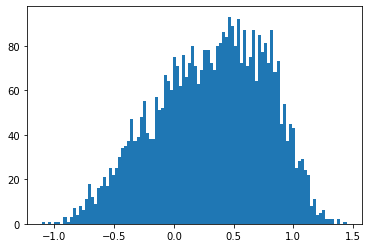

In [5]:
x_given_y = x[(y > 0.95) & (y < 1.05)]
plt.hist(x_given_y, bins=100)